# Base Predict Code

In [1]:
import os
import torch
import cv2
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=10, 10

In [2]:
from model.build_model import Build_Model
from utils.tools import *
from eval.evaluator import Evaluator
import config.yolov4_config as cfg
from utils.visualize import *
from utils.torch_utils import *

In [3]:
# GPU device
# Check GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Device: ", device)

Device:  cpu


In [4]:
model = Build_Model().to(device)

******************** Initing MobilenetV2 weights ********************
initing Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
initing BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
initing BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
initing BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
initing BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=96, bias=False)
initing BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
initing Conv2d(96, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
i

In [10]:
w_path = './model_1.pt'
chkpt = torch.load(os.path.join(w_path))
# chkpt

In [11]:
model.load_state_dict(chkpt['model'])

<All keys matched successfully>

In [12]:
classes = ['1', '2', '3', '4', '5', '6']

In [17]:
test_path = 'test_img/'
imgs_path = os.listdir(test_path)
ratio = 0.1

for img_path in imgs_path:
    path = os.path.join(test_path, img_path)
    print(path)
    
    print(img_path)
    
    img = cv2.imread(path)
    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
#     resized_img = cv2.resize(img, (832, 832), interpolation=cv2.INTER_AREA)
#     print(img)
    bboxes_prd = Evaluator(model).get_bbox(resized_img, img_path)
#     print(bboxes_prd)
#     print(len(bboxes_prd))
    
    if bboxes_prd.shape[0] != 0:
        boxes = bboxes_prd[..., :4]
        class_inds = bboxes_prd[..., 5].astype(np.int32)
        scores = bboxes_prd[..., 4]

        result = visualize_boxes(
            image=resized_img,
            boxes=boxes,
            labels=class_inds,
            probs=scores,
            class_labels=classes,
        )
        
        cv2.imwrite(test_path + 'pred_' + img_path, result)
        print("Save Image")

test_img/5a28ab39e4b028f6846ad668.jpg
5a28ab39e4b028f6846ad668.jpg
Save Image


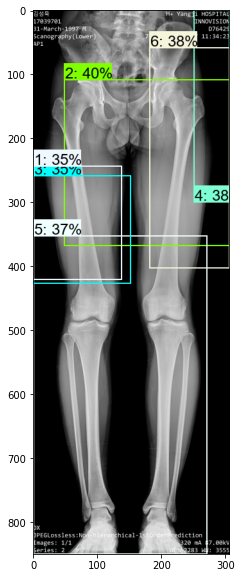

In [14]:
plt.imshow(result)

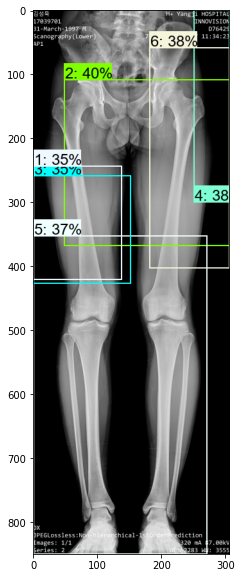

In [15]:
plt.imshow(resized_img)